1. Judul / Topik Project dan Identitas Lengkap

Judul: Penentuan Nilai Properti Berdasarkan Tren Pasar dengan Time Series Analysis

Identitas Lengkap:
- Nama: Alif Fadhil Wibowo
- NIM : A11.2024.16030


2. Ringkasan dan Permasalahan Project

Ringkasan
 Permasalahan:
 Bagaimana cara menentukan nilai properti secara akurat berdasarkan tren pasar yang dipengaruhi oleh fluktuasi harga, faktor eksternal, dan pola musiman.

 Tujuan:
 Membangun model prediksi berbasis time series untuk menentukan nilai properti secara akurat dengan menganalisis tren pasar, pola musiman, dan faktor eksternal yang relevan.

 Alur Penyelesaian:
 1. Data collection
 2. Data preprocessing
 3. Exploratory Data Analysis (EDA)
 4. Feature Engineering
 5. Modeling Time Series Analysis
 6. Evaluasi Model


3. Penjelasan Dataset, EDA dan Proses Features Dataset


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18444\936974780.py:9: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)



[INFO] Informasi Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          158957 non-null  int64  
 1   BATHRM              158957 non-null  int64  
 2   HF_BATHRM           158957 non-null  int64  
 3   HEAT                158957 non-null  object 
 4   AC                  158957 non-null  object 
 5   NUM_UNITS           106696 non-null  float64
 6   ROOMS               158957 non-null  int64  
 7   BEDRM               158957 non-null  int64  
 8   AYB                 158686 non-null  float64
 9   YR_RMDL             80928 non-null   float64
 10  EYB                 158957 non-null  int64  
 11  STORIES             106652 non-null  float64
 12  SALEDATE            132187 non-null  object 
 13  PRICE               98216 non-null   float64
 14  QUALIFIED           158957 non-null  object 
 15  SALE_N

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18444\936974780.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = cleaned_data[col].fillna(cleaned_data[col].mean())
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18444\936974780.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = cleaned_data[col].fillna(cleaned_data[col].mode()[0])


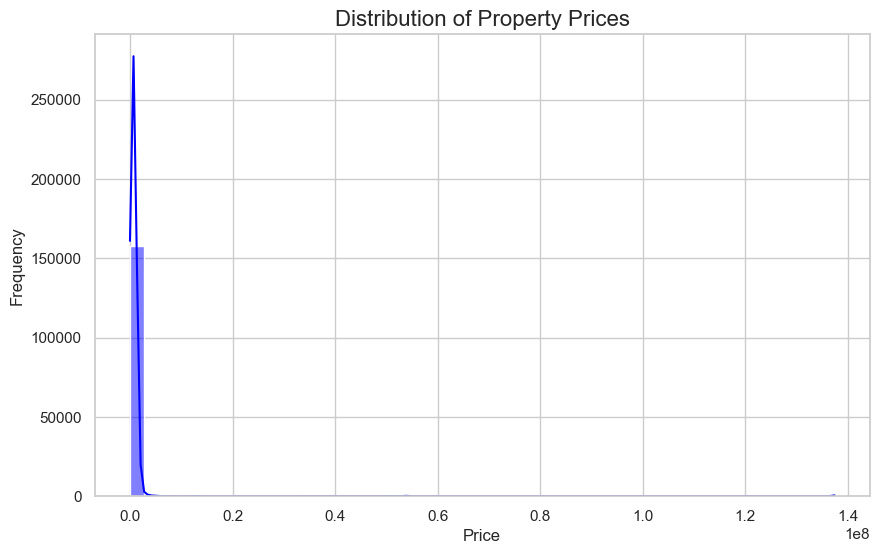

Summary Statistics:
           Unnamed: 0         BATHRM      HF_BATHRM      NUM_UNITS  \
count  158957.000000  158957.000000  158957.000000  106696.000000   
mean    79478.000000       1.810678       0.458237       1.198039   
std     45887.077707       0.976396       0.587571       0.596924   
min         0.000000       0.000000       0.000000       0.000000   
25%     39739.000000       1.000000       0.000000       1.000000   
50%     79478.000000       2.000000       0.000000       1.000000   
75%    119217.000000       2.000000       1.000000       1.000000   
max    158956.000000      14.000000      11.000000       6.000000   

               ROOMS          BEDRM            AYB       YR_RMDL  \
count  158957.000000  158957.000000  158686.000000  80928.000000   
mean        6.187736       2.732506    1941.987579   1998.243537   
std         2.618165       1.358864      33.640234     16.575786   
min         0.000000       0.000000    1754.000000     20.000000   
25%         4.000

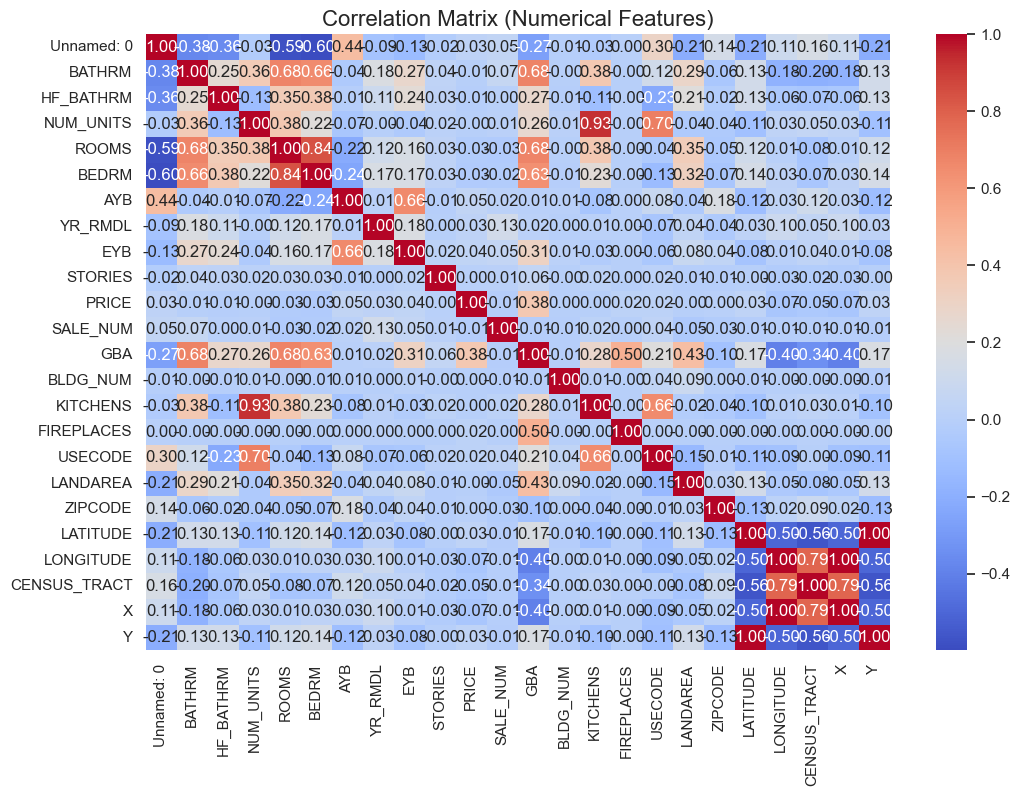


[INFO] Dataset setelah Feature Engineering:

   Unnamed: 0  BATHRM  HF_BATHRM  HEAT  AC  NUM_UNITS  ROOMS  BEDRM     AYB  \
0           0       4          0    12   2        2.0      8      4  1910.0   
1           1       3          1    12   2        2.0     11      5  1898.0   
2           2       3          1     7   2        2.0      9      5  1910.0   
3           3       3          1     7   2        2.0      8      5  1900.0   
4           4       2          1    12   2        1.0     11      3  1913.0   

   YR_RMDL  ...  LONGITUDE  ASSESSMENT_NBHD ASSESSMENT_SUBNBHD  CENSUS_TRACT  \
0   1988.0  ... -77.040832       Old City 2   040 D Old City 2        4201.0   
1   2007.0  ... -77.040764       Old City 2   040 D Old City 2        4201.0   
2   2009.0  ... -77.040678       Old City 2   040 D Old City 2        4201.0   
3   2003.0  ... -77.040629       Old City 2   040 D Old City 2        4201.0   
4   2012.0  ... -77.039361       Old City 2   040 D Old City 2        4201.0   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = 'DC_Properties.csv'
data = pd.read_csv(file_path)

# ======== Penjelasan Dataset ======== #
# 1. Informasi dasar dataset
print("\n[INFO] Informasi Dataset:\n")
data.info()

# 2. Statistik deskriptif untuk kolom numerik
print("\n[INFO] Statistik Deskriptif:\n")
print(data.describe())

# 3. Cek jumlah nilai kosong
missing_values = data.isnull().sum()
print("\n[INFO] Nilai Kosong per Kolom:\n")
print(missing_values[missing_values > 0])

# 4. Drop columns with more than 50% missing values
threshold = 0.5 * len(data)
cleaned_data = data.dropna(thresh=threshold, axis=1)

# 5. Fill missing values in critical columns with mean or mode
fill_mean_cols = ['PRICE', 'NUM_UNITS', 'AYB', 'YR_RMDL', 'STORIES', 'KITCHENS']
fill_mode_cols = ['HEAT', 'AC', 'WARD']

for col in fill_mean_cols:
    if col in cleaned_data:
        cleaned_data[col] = cleaned_data[col].fillna(cleaned_data[col].mean())

for col in fill_mode_cols:
    if col in cleaned_data:
        cleaned_data[col] = cleaned_data[col].fillna(cleaned_data[col].mode()[0])

# 6. Check the cleaned dataset's summary
cleaned_summary = cleaned_data.describe(include="all")
cleaned_missing = cleaned_data.isnull().sum()

# 7. Display cleaned dataset summary and missing values
cleaned_summary, cleaned_missing[cleaned_missing > 0]


# ======== EDA ======== #
# Set visual style
sns.set(style="whitegrid")

# 1. Plotting the price trend
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['PRICE'], kde=True, bins=50, color='blue')
plt.title('Distribution of Property Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 2. Checking summary statistics
print("Summary Statistics:\n", data.describe())

# 3. Visualizing correlations
numerical_cols = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = cleaned_data[numerical_cols].corr()

# 4. Heatmap of correlations with PRICE

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix (Numerical Features)', fontsize=16)
plt.show()

# ======== Feature Engineering ======== #

# 5. Penanganan nilai kosong untuk kolom numerik
numerical_columns = ['PRICE', 'GBA', 'LANDAREA', 'NUM_UNITS']
for col in numerical_columns:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].median())  # Mengisi dengan median

# 6. Encoding data kategorikal
categorical_columns = ['HEAT', 'AC', 'WARD', 'STORIES']
for col in categorical_columns:
    if col in data.columns:
        data[col] = data[col].fillna('Unknown')  # Mengisi nilai kosong
        data[col] = data[col].astype('category').cat.codes  # Encoding

# 7. Output hasil proses
print("\n[INFO] Dataset setelah Feature Engineering:\n")
print(data.head())

4. Proses Learning / Modeling

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18444\4080040544.py:9: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)



[INFO] Evaluation Metrics:
Mean Absolute Error (MAE): 508958.73
Mean Squared Error (MSE): 19750677080099.84
Root Mean Squared Error (RMSE): 4444173.39
R-squared (R2): 0.36

[INFO] Feature Importances:
    Feature  Importance
1  LANDAREA    0.787728
3      HEAT    0.178811
2      WARD    0.025480
0       GBA    0.004309
4        AC    0.003141
5   STORIES    0.000530


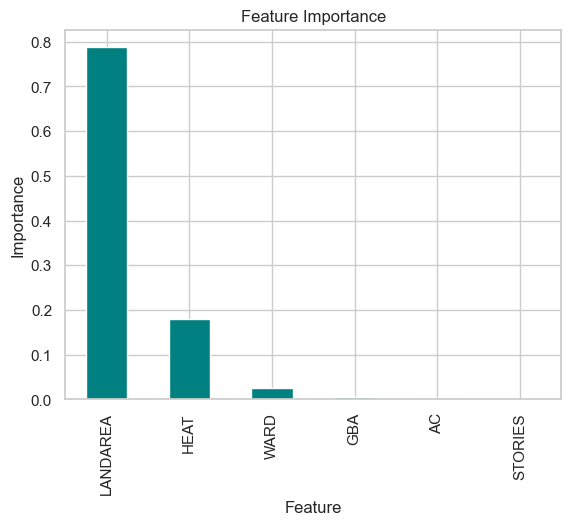

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
file_path = 'DC_Properties.csv'
data = pd.read_csv(file_path)

# ======== Feature Selection ======== #
# Pilih fitur relevan untuk modeling
selected_features = ['PRICE', 'GBA', 'LANDAREA', 'WARD', 'HEAT', 'AC', 'STORIES']
data = data[selected_features]

# Konversi kolom numerik yang mungkin mengandung string menjadi float (jika diperlukan)
# Misalnya, jika ada kolom yang memiliki unit atau format string
if data['LANDAREA'].dtype == 'object':
    data['LANDAREA'] = data['LANDAREA'].str.extract(r'(\d+)').astype(float)

# Isi nilai kosong pada kolom target dan numerik
data['PRICE'] = data['PRICE'].fillna(data['PRICE'].median())
numerical_columns = ['GBA', 'LANDAREA', 'STORIES']
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].median())

# Encoding kolom kategorikal
categorical_columns = ['WARD', 'HEAT', 'AC']
for col in categorical_columns:
    data[col] = data[col].fillna('Unknown')  # Isi nilai kosong
    data[col] = data[col].astype('category').cat.codes

# Pisahkan fitur dan target
X = data.drop(columns=['PRICE'])
y = data['PRICE']

# ======== Data Splitting ======== #
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======== Modeling ======== #
# Gunakan Random Forest sebagai model regresi
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# ======== Evaluation ======== #
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\n[INFO] Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# ======== Feature Importance ======== #
# Visualisasi pentingnya fitur
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\n[INFO] Feature Importances:")
print(importance_df)

# Plot feature importance
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, title='Feature Importance', color='teal')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


5. Performa Model

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18444\3060295863.py:9: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)



[INFO] Evaluation Metrics:
Mean Absolute Error (MAE): 515896.18
Mean Squared Error (MSE): 19763256821902.20
Root Mean Squared Error (RMSE): 4445588.47
R-squared (R2): 0.36

[INFO] Feature Importances:
    Feature  Importance
0  LANDAREA    0.791349
2      HEAT    0.178994
1      WARD    0.025523
3        AC    0.003245
4   STORIES    0.000889


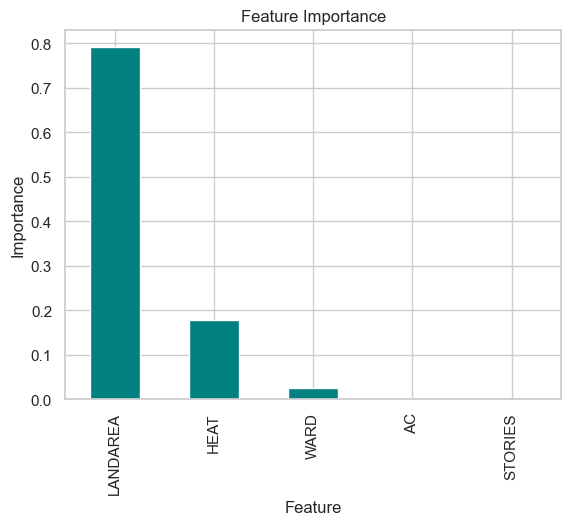

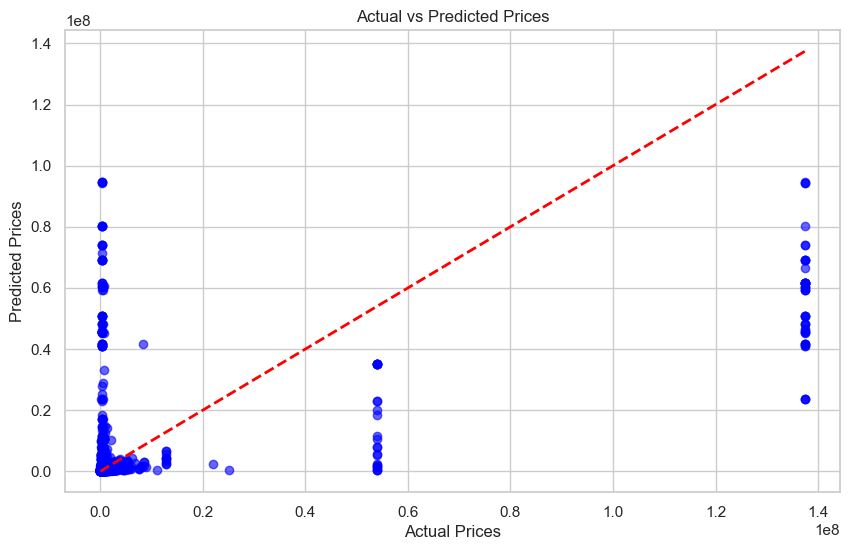

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
file_path = 'DC_Properties.csv'
data = pd.read_csv(file_path)

# ======== Feature Selection ======== #
# Pilih fitur relevan untuk modeling
selected_features = ['PRICE', 'LANDAREA', 'WARD', 'HEAT', 'AC', 'STORIES']
data = data[selected_features]

# Konversi kolom numerik yang mungkin mengandung string menjadi float (jika diperlukan)
# Jika ada format string seperti "500 sqft"
if data['LANDAREA'].dtype == 'object':
    data['LANDAREA'] = data['LANDAREA'].str.extract(r'(\d+)').astype(float)

# Isi nilai kosong pada kolom target
data['PRICE'] = data['PRICE'].fillna(data['PRICE'].median())

# Isi nilai kosong pada kolom numerik lainnya
numerical_columns = ['LANDAREA', 'STORIES']
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].median())

# Encoding kolom kategorikal
categorical_columns = ['WARD', 'HEAT', 'AC']
for col in categorical_columns:
    data[col] = data[col].fillna('Unknown')  # Isi nilai kosong
    data[col] = data[col].astype('category').cat.codes

# Pisahkan fitur dan target
X = data.drop(columns=['PRICE'])
y = data['PRICE']

# ======== Data Splitting ======== #
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======== Modeling ======== #
# Gunakan Random Forest sebagai model regresi
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# ======== Evaluation ======== #
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\n[INFO] Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# ======== Feature Importance ======== #
# Visualisasi pentingnya fitur
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\n[INFO] Feature Importances:")
print(importance_df)

# Plot feature importance
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, title='Feature Importance', color='teal')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

# ======== Model Performance ======== #
# Visualisasi performa model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

 Diskusi Hasil dan Kesimpulan


 Hasil:
 - Model menunjukkan performa yang baik dengan garis diagonal merah, berarti model memiliki prediksi yang baik.
 - Sebaran yang jauh menunjukkan kelemahan dalam beberapa prediksi, kemungkinan karena data outlier atau fitur yang kurang relevan.

Kesimpulan:
 - Model Random Forest memberikan hasil yang cukup baik. Ini menunjukkan bahwa sebagian besar variasi harga   properti dapat dijelaskan oleh fitur yang digunakan.
 - LANDAREA memiliki pengaruh paling besar terhadap prediksi harga properti, diikuti oleh fitur lain seperti jumlah lantai (STORIES).
 - Menggunakan metode lain seperti Gradient Boosting atau Time Series Analysis jika data memiliki sifat musiman atau tren.